# 벨만 방정식 구현

In [11]:
import numpy as np
import pylab as plt

In [6]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
goal = 7

In [4]:
MATRIX_SIZE = 8

R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
print(R)

[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]


In [7]:
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]]= 0

R[goal,goal]= 100
R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [8]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

gamma = 0.8
initial_state = 1

#움직일 수 있는 곳
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 


#움직일 수 있는 곳중 랜덤 하나 선택
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)


#Q값 업데이트 (벨만 방정식)
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
  
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

In [9]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 144.0
Score: 235.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 0.0
Score: 315.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 0.0
Score: 315.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 0.0
Score: 315.55555555555554
max_value 0.0
Score: 315.55555555555554
max_value 144.0
Score: 395.55555555555554
max_value 0.0
Score: 395.55555555555554
max_value 0.0
Score: 395.55555555555554
max_value 144.0
Score: 395.55555555555554
max_value 144.0
Score: 395.55555555555554
max_value 144.0
Score: 395.55555555555554
max_value 115.2
Score: 459.55555555555554
max_value 0.0
Score: 459.555

max_value 202.8647742153201
Score: 979.9560430095004
max_value 253.5809677691501
Score: 979.9560430095004
max_value 202.8647742153201
Score: 979.9560430095004
max_value 398.0647742153201
Score: 979.9560430095004
max_value 253.5809677691501
Score: 979.9560430095004
max_value 253.5809677691501
Score: 979.9560430095004
max_value 398.0647742153201
Score: 979.9560430095004
max_value 253.5809677691501
Score: 979.9560430095004
max_value 253.5809677691501
Score: 979.9560430095004
max_value 398.0647742153201
Score: 979.9560430095004
max_value 253.5809677691501
Score: 979.9560430095004
max_value 253.5809677691501
Score: 979.9560430095004
max_value 398.0647742153201
Score: 979.9560430095004
max_value 318.0647742153201
Score: 980.1748143400766
max_value 253.5809677691501
Score: 980.1748143400766
max_value 253.5809677691501
Score: 980.1748143400766
max_value 318.0647742153201
Score: 980.1748143400766
max_value 498.0647742153201
Score: 979.3198366926309
max_value 498.45181937225607
Score: 978.637049

Most efficient path:
[0, 1, 2, 7]


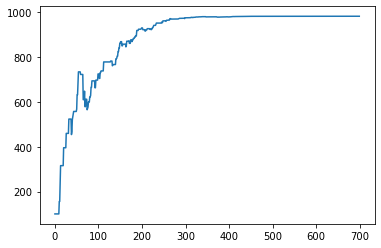

In [10]:
current_state = 0
steps = [current_state]


while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()